# Identifying Investment Opportunities - Optimizing Ad Campaigns

The goal of this analysis is to identify the two greatest markets for advertising e-commerce programming courses that specialize in web and mobile development.

We're looking at existing data on new coders and the markets they're interested in. As a result, we can reasonably estimate the ideal market to advertise in. To do this efficiently, we must first comprehend:
* The locations of new programmers
* The locations with the greatest number of new programmers
* How much money new programmers are willing to spend

## Summary of Results
After reviewing the data, we found that the United States is the ideal target market for promoting e-commerce programming courses. India and Canada are neck and neck for the second best market.

# Exploring Existing Datasets - New Coder Survey Data

Under some conditions, surveys might be required to acquire the essential data. However, if the data is useful and trustworthy, it is more cost-effective and faster to leverage existing data.

FreeCodeCamp made this dataset publicly availble on [github](https://github.com/freeCodeCamp/2017-new-coder-survey). Below we will explore what's inside by loading in the raw clean data from the repository located [here](https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv)

In [1]:
# Read data
import pandas as pd
data = pd.read_csv('Survey-Data.csv', low_memory = False) # low_memory = False to silence dtypes warning

# Examine Data
print(data.shape)
pd.options.display.max_columns = None
data.head()


(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

The following are the columns out of 136 that we are interested in:
- Age, 
- BootCamp, 
- BootcampLoanYesNo, 
- CodeEvents(All),
- CommuteTime(Radio Advertising?),
- CountryLive,
- EmploymentStatus,
- HoursLearning,
- Income,
- JobRoleInterest,
- JobApplyWhen (For structuring length of courses?),
- MoneyForLearning, 
- MonthsProgramming,
- Podcast(All),
- Resource(All),
- YouTube*


# Verifying the Sample 
To proceed with the study, we must ensure that our sample can answer our questions regarding a population of new programmers interested in online programming classes that are being offered.

We want to make sure that this sample can answer questions concerning new coders interested in online and mobile development, and then we may check into the following variables:

* The locations of new programmers
* The locations with the greatest number of new programmers
* How much money new programmers are willing to spend

From our brief reseach above, we found the ```JobRoleInterest``` column which shows each participants job role(s) interest. Let's look at this column to see if web and mobile development are represented, as well as what other types of professions the survey respondents are interested in.

In [2]:
# Generate frequency distribution for JobRoleInterest 
data['JobRoleInterest'].value_counts(normalize=True)*100 # Returns percentage

Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                

On the surface, we may see:

* A large number of people are interested in web development. Full-Stack Web Development, Front-End Web Development, and Back-End Web Development Approximately 20%
* Only 1.7 percent of people are interested in Mobile Developer.

A closer look reveals that many respondents are interested in more than one employment role. As a result, the frequency distribution does not show us categories that are grouped together.

It will be fascinating to observe how evenly our table is spread across the categories. Let's reorganize the information so that each category reflects a particular Job Role.

## Finding The Most Interesting Jobs

To redistribute the grouped interests based on work roles, we will need to:

* Drop all NA values if there is any
* Split grouped interests by ','
* Remove all NonAlphaNumeric characters    
* Count the frequency of unique interests
* Generate a new frequency plot showing the frequency of each categorical job role.

In [3]:
# Drop all NA values if there is any
if data['JobRoleInterest'].isnull().any():
    nonull_interests = data['JobRoleInterest'].dropna()
else:
    nonull_interests = data['JobRoleInterest']


# Split grouped interests by comma
split_interests = []
for interests in nonull_interests:
    interests_list = interests.split(',')
    for interest in interests_list:
            split_interests.append(interest)


print(len(nonull_interests))
print(len(split_interests))

6992
22600


We can do a length count after splitting the grouped interests and appending them to a new list and find that we now have a list that is more than three times longer than our original. This implies that a large proportion of respondents are interested in more than one job role.

Let's take a look at the top jobs that the majority of new developers are looking for.

*(Some interests separated by '/' and 'or' could be appended further, adding a few extra interests to the length of unique interests, but are insignificant for our needs.)

In [4]:
# Remove All Non-AlphaNumeric Characters
import re

cleaned_interests = []
for i in split_interests:
    clean_interest = re.sub("[^0-9a-zA-Z']+", ' ', i).rstrip()
    cleaned_interests.append(clean_interest.lstrip(' '))

In [5]:
# Count the frequencys of unique interests
interest_frequency = dict()

for interest in cleaned_interests:
    if interest in interest_frequency:
        interest_frequency[interest] += 1
    else:
        interest_frequency[interest] = 1

# Sort the Job interests from highest Frequency to Lowest
sorted_unique_interests = sorted(interest_frequency.items(), key=lambda x: x[1], reverse=True)

# Print the head
sorted_unique_interests[:15]

[('Full Stack Web Developer', 4198),
 ('Front End Web Developer', 3533),
 ('Back End Web Developer', 2772),
 ('Mobile Developer', 2304),
 ('Data Scientist', 1643),
 ('Game Developer', 1628),
 ('User Experience Designer', 1469),
 ('Information Security', 1326),
 ('Data Engineer', 1248),
 ('DevOps SysAdmin', 927),
 ('Product Manager', 814),
 ('Quality Assurance Engineer', 498),
 ('Software Engineer', 11),
 ('Software Developer', 6),
 ('Software engineer', 4)]

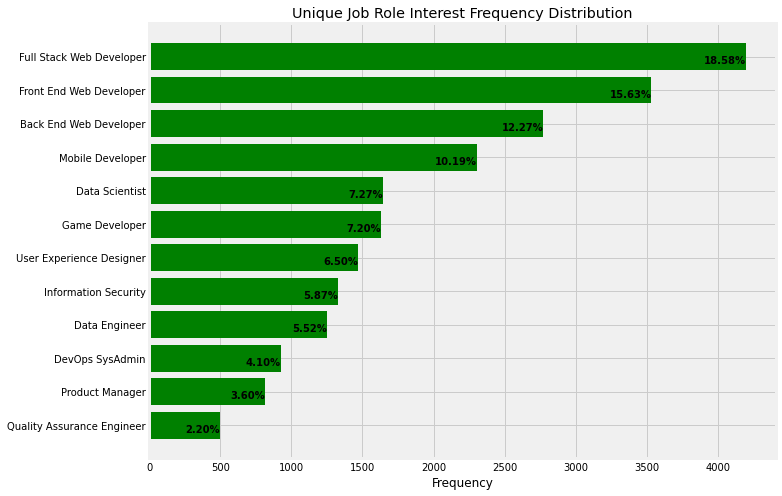

In [6]:
# Graph for the frequency table above
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)


# Separate list of Tuples 
x,y = zip(*sorted_unique_interests)
total = sum(y) # Used for percentage

# Configure plot
fig, ax = plt.subplots()

# Reassign variables for readability and Select top Values
job_role = x[:12]
frequency = y[:12]

# Configure y axis for Job Role Labeling
y_pos = range(len(job_role))
ax.set_yticks(y_pos)
ax.set_yticklabels(job_role)
ax.invert_yaxis()  # labels read top-to-bottom
ax.tick_params(right=0, left=0, top=0, bottom=0) # Remove ticks
    
# Add percentage text on respective bars
for i, v in enumerate(frequency):
    ax.text(v, 
            i + .2, 
            '{:1.2f}{}'.format((v/total)*100,'%'), 
            color='black', 
            ha='right', 
            picker=4,
            fontweight='bold')

# Assign Labels for plot
ax.set_xlabel('Frequency')
ax.set_title('Unique Job Role Interest Frequency Distribution')

# Plot Horizontal Bars
ax.barh(y_pos, frequency, align='center',
        color='green', ecolor='black')

plt.show()


It shows that approximately 46% of respondents are interested in some form of web development. Only 10% are interested in mobile device development.

Because this e-commerce site focuses on web and mobile development, they will be able to capture more than half of the whole market share. This is a good sign because it demonstrates that our sample group is representative of the population of interest.

## Finding the best country to Advertise
We can now zoom out and look at where these folks live to begin targeting our market locations now that we know what types of occupations they are interested in.

We'll be looking at the ```CountryLive``` column from our dataset to determine where the majority our new coders live. This way any ads we run can reach the greatest number of people.

In [7]:
# Isolate the participants that answered what role they'd be interested in
data_good = data[data['JobRoleInterest'].notnull()].copy()

# Frequency tables with absolute and relative frequencies
absolute_freq = data_good['CountryLive'].value_counts()
relative_freq = data_good['CountryLive'].value_counts(normalize = True) * 100

In [8]:
# relative_freq = data['CountryLive'].value_counts(normalize=True)*100
# absolute_freq = data['CountryLive'].value_counts()

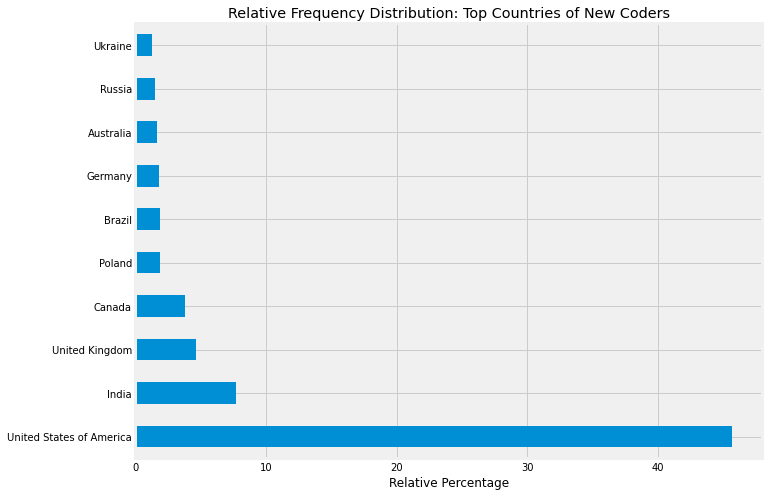

In [9]:
title = ("Relative Frequency Distribution: Top Countries of New Coders")
plt.xlabel('Relative Percentage')
relative_freq[:10].plot.barh(title=title)
plt.show()


We can instantly see that the United States of America and India have the most aspiring programmers. The United States accounted for 37.76% of all respondents, while India accounted for 9.12%.

We could stop here and market to these two countries, but we should go deeper for a more thorough research, especially since we have all of this data to make an informed decision.

# Digging Deeper: Filtering Out The Freeloaders

As we dig deeper into our research, we'll concentrate our focus to the top four countries: the United States, India, the United Kingdom, and Canada. These countries had a sizable number of responses, and they all spoke English.

In the future, we will determine how much money these people have to spend so that we may avoid targeting areas that are oversaturated with free learners and/or people who cannot buy our courses.

## The Approach

The ```MoneyForLearning``` column describes how much money respondents have spent since they started learning coding. The e-commerce site will be selling monthly subscriptions at a price of $59 per month, so well want to determine how much money each new coder spends per month. We'll use the ```MonthsProgramming``` column to determine this number. 


In [10]:
# Find per month spending and replace 0 values with 1 in MonthsProgramming column to avoid div/0
data_good['MonthsProgramming'].replace(0,1, inplace=True)
data_good['MoneySpentPerMonth'] = data_good['MoneyForLearning']/data_good['MonthsProgramming']

In [11]:
# Number of Nan values in new column counting total length - total Non-NaN values
nancount = len(data_good['MoneySpentPerMonth']) - data_good['MoneySpentPerMonth'].count()
nancount

675

In [12]:
# Drop NaN values in Moneyspentpermonth
data_good = data_good[data_good['MoneySpentPerMonth'].notnull()]

# Remove the rows with null values in 'CountryLive'
data_good = data_good[data_good['CountryLive'].notnull()]

# Check to see that we still have enough data 
data_good['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

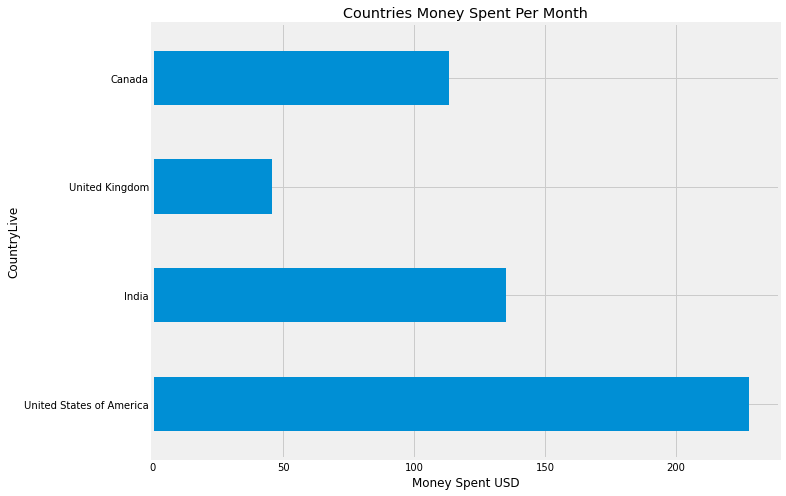

In [13]:
# Group the columns by country and compute the mean
countries_mean = data_good.groupby('CountryLive').mean()

# Select the top 4 countries and show the average money spent per month
plt.xlabel('Money Spent USD')
title = ('Countries Money Spent Per Month')
countries_mean['MoneySpentPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']].plot.barh(title=title)
plt.show()

According to the frequency graphic above, the United States spends the most money per month. It's strange that the UK spends the least amount given that its GDP is somewhat larger than India's.

# Checking For Extremes
Because the data appears to be a little strange, we will create a box plot of each country's distributions to examine whether there are any severe outliers distorting our averages.

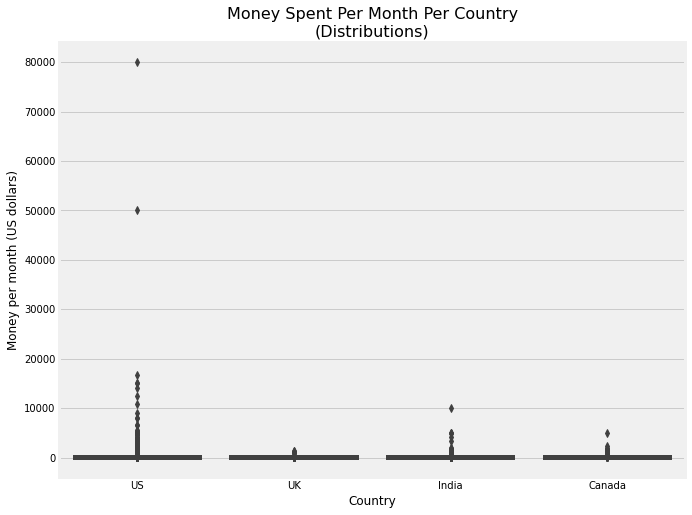

In [14]:
# Isolate only the countries of interest
top_4 = data_good[data_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'MoneySpentPerMonth', x = 'CountryLive',
            data = top_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

We can observe that the United States spends between $50,000 and $80,000 every month. This isn't impossible, but it's exceedingly unlikely that someone would spend that much money, so we'll remove the outliers and recalculate the mean.

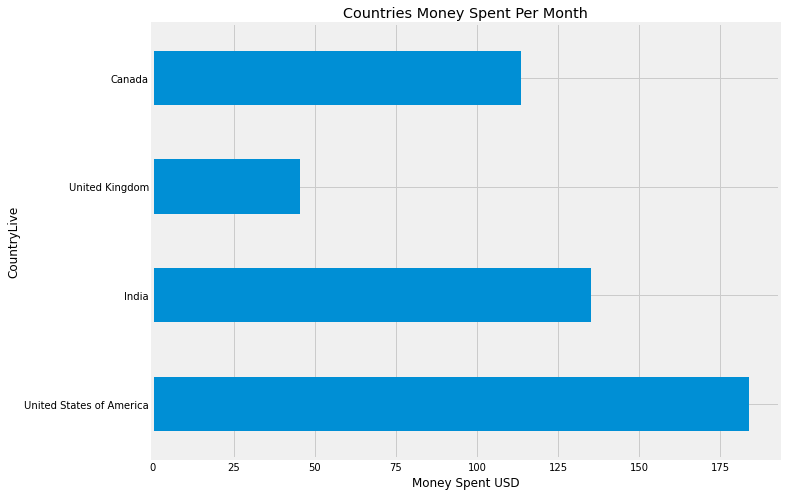

In [15]:
# Remove any outliers greater than 40000
data_good = data_good[data_good['MoneySpentPerMonth'] < 40000]

# Recompute the mean
countries_mean = data_good.groupby('CountryLive').mean()

# Select the top 4 countries and show the average money spent per month
plt.xlabel('Money Spent USD')
title = ('Countries Money Spent Per Month')
countries_mean['MoneySpentPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']].plot.barh(title=title)
plt.show()



At this point, it's rather obvious that one of the countries to advertise in would be the United States. But what would the second best country look like?

In terms of the amount of money spent by new developers, India and Canada are fairly close. Let's see if we can spot any important differences between the countries that may assist us in making a more informed decision.

We looked at all of the responses when calculating the average monthly spending. However, because we are mostly developing programs for online and mobile development, it may be worthwhile establish construct averages with just these new developers in mind.

# Finding the Average Amount of Money Spent Per Month: Looking at Web and Mobile Developers

In [16]:
# First we'll filter out all other new coders so were only looking at web and mobile
mobile_web = data_good[data_good['JobRoleInterest'].str.contains(
    'Web|Mobile')]
# Then we'll filter by our top 4 countries
mobile_web_top_4 = mobile_web[mobile_web['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Check to see that we still have enough data points
mobile_web['CountryLive'].value_counts().head()


United States of America    2515
India                        393
United Kingdom               247
Canada                       203
Poland                       114
Name: CountryLive, dtype: int64

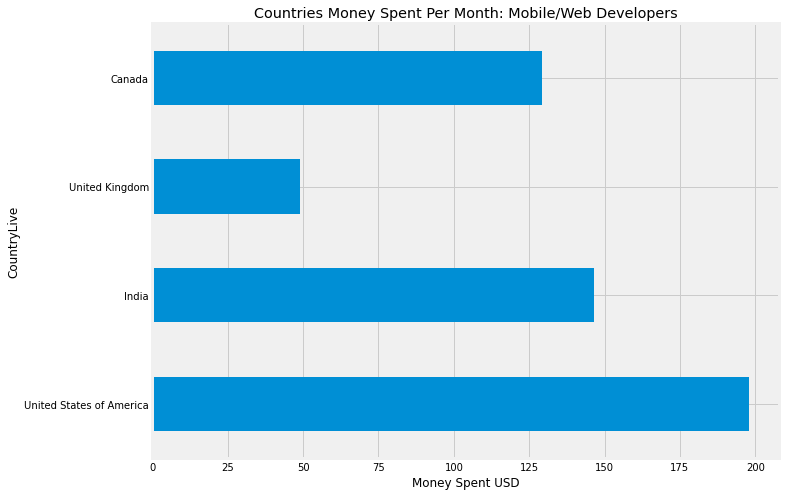

In [17]:
# Group the columns by country and compute the mean
countries_mean = mobile_web.groupby('CountryLive').mean()

# Select the top 4 countries and show the average money spent per month
plt.xlabel('Money Spent USD')
title = ('Countries Money Spent Per Month: Mobile/Web Developers')
countries_mean['MoneySpentPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']].plot.barh(title=title)
plt.show()

The sort of work role interest appears to have little impact on the amount of money new coders are willing to pay per month. This could be due to the fact that the majority of respondents were interested in more than one job function. It's also feasible that the job function has no effect on how much money new developers are ready to invest.

We can either continue examining the data or let the marketing department decide on a second country.

One indicator that comes to mind is how much time respondents spend studying per month. Because our e-commerce site is based on a monthly membership, marketing to the group of new coders with the least amount of time to learn would be great. They will study more and thus subscribe for a longer period of time this manner.

In [18]:
data_good['HoursLearning'].describe()

count    6015.000000
mean       17.105071
std        15.028925
min         0.000000
25%         6.000000
50%        12.000000
75%        20.500000
max       168.000000
Name: HoursLearning, dtype: float64

We can see that the max hours learning is 168. This equates to one week. This is good to know because there was no documentation on the description for this column. We now know that ```HoursLearning``` describes the amount of hours a respondent spends learning each week.

Let's look at this metric by country to see whether we can choose between India and Canada.

## Hours Learning by Country

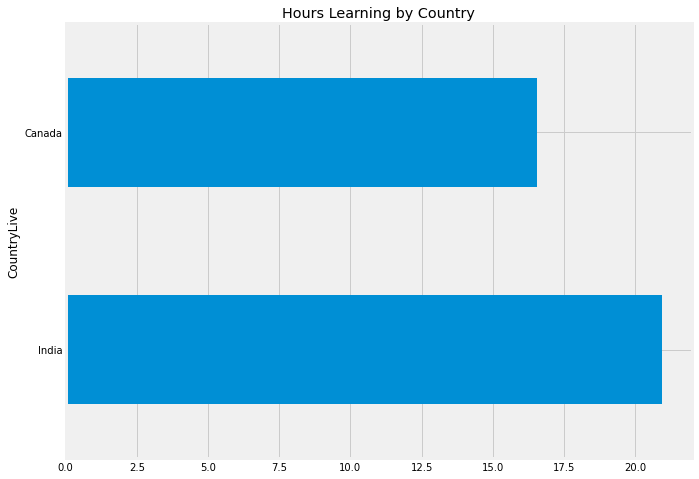

In [19]:
title='Hours Learning by Country'
countries_mean['HoursLearning'][[
                            'India',
                            'Canada']].plot.barh(title=title)
plt.show()

It appears that Canada has a lower weekly learning average. This difference isn't significant, but it could imply an extra month of learning subscription. This information will be valuable in either case.

# Conclusion
In this analysis, we conducted a freecodecamp survey to determine the top two markets in which to advertise for an e-commerce company that specializes in web and mobile development.

The majority of new coders were interested in online and mobile programming, according to our findings.

We defined market region based on where respondents lived and discovered the top four countries: the United States, India, Canada, and the United Kingdom.

Among these four countries, the United States was an obvious choice for a marketing effort. Choosing between India and Canada was more challenging because we have contradictory information supporting both countries. We can split our marketing spending across these three nations, focus solely on the United States, or some other combination. We believe it is appropriate for the marketing team to make the decision based on their domain knowledge.